# Floyd-Warchall

## Algorithm and experiment functions

In [7]:
using BenchmarkTools
using Statistics
using Random

Random.seed!(12345)  # For reproducibility

# Graph generating function
# Starting with graph that has no cycles
# Add edges without creating negative cycles
# The graph is generated in a way that guarantees no cycles by only adding edges from i to j where i < j
function generate_safe_fw_graph(n::Int, edge_prob::Float64, neg_prob::Float64)
    A = fill(Inf, n, n)
    for i in 1:n
        A[i, i] = 0.0
    end

    # Generate edges only from i to j where i < j to guarantee no cycles
    for i in 1:n
        for j in i+1:n
            if rand() < edge_prob
                weight = rand() < neg_prob ? rand(-5.0:1.0:-1.0) : rand(0.0:1.0:10.0)
                A[i, j] = weight
            end
        end
    end

    return A
end


# Main Algorithm Floyd Warshall
function floydwarshall(A::Matrix{Float64})
    n = size(A, 1)
    dist = copy(A)

    for k in 1:n
        for i in 1:n
            for j in 1:n
                if dist[i, j] > dist[i, k] + dist[k, j]
                    dist[i, j] = dist[i, k] + dist[k, j]
                end
            end
        end
    end

    return dist
end

# Function to check for negative cycles
function has_negative_cycle(A::Matrix{Float64})
    for i in 1:size(A, 1)
        if A[i, i] < 0.0
            return true
        end
    end
    return false
end

# Time estimator for later experiments
function estimate_instances_fw(A::Matrix{Float64}, target_time::Float64)
    test_instances = 5
    instance_times = [@elapsed floydwarshall(copy(A)) for _ in 1:test_instances]
    avg_time = mean(instance_times)

    estimated_instances = max(1, Int(round(target_time / avg_time)))

    return estimated_instances
end

# Time measuring function
function measure_fw_time(A::Matrix{Float64}, target_time::Float64)
    instances = estimate_instances_fw(A, target_time)
    instance_times = Vector{Float64}()

    if instances > 0 && size(A, 1) < 400
        _ = floydwarshall(A)
    end

    for _ in 1:instances
        dist = nothing
        time = @elapsed begin 
            dist = floydwarshall(A)
        end
        push!(instance_times, time)

    end

    avg_time = mean(instance_times)
    median_time = median(instance_times)
    total_time = sum(instance_times)
    
    return avg_time, median_time, total_time, instances, instance_times
end

# Function for runnig whole experiment using additional functions
function run_experiment(edge_prob::Float64=0.5, neg_prob::Float64=0.1, target_time::Float64=20.0)
    sizes = [50, 100, 200, 400, 600, 800, 1000, 1200]
    all_times = Vector{Vector{Float64}}() 

    for size in sizes
        A = generate_safe_fw_graph(size, edge_prob, neg_prob)
        avg_time, median_time, total_time, instances, instance_times = measure_fw_time(A, target_time)
        push!(all_times, instance_times)
        println("Size: $size | Instances: $instances | Avg Time: $avg_time | Median Time: $median_time | Total Time: $total_time")
        println("--------------------------------------------------")
    end

    return all_times
end

run_experiment (generic function with 4 methods)

## Run experiment and make violin plot

Size: 50 | Instances: 3062117 | Avg Time: 0.00014207829109730294 | Median Time: 0.0001339 | Total Time: 435.06035049999997
--------------------------------------------------
Size: 100 | Instances: 388227 | Avg Time: 0.00105048176118611 | Median Time: 0.0010251 | Total Time: 407.8253827
--------------------------------------------------
Size: 200 | Instances: 46403 | Avg Time: 0.008117596349373963 | Median Time: 0.0078553 | Total Time: 376.6808234
--------------------------------------------------
Size: 400 | Instances: 5130 | Avg Time: 0.0840021630994152 | Median Time: 0.07134105 | Total Time: 430.9310967
--------------------------------------------------
Size: 600 | Instances: 1173 | Avg Time: 0.3241047010230178 | Median Time: 0.3205359 | Total Time: 380.17481429999987
--------------------------------------------------
Size: 800 | Instances: 464 | Avg Time: 0.790333411637931 | Median Time: 0.8138817 | Total Time: 366.714703
--------------------------------------------------
Size: 1000

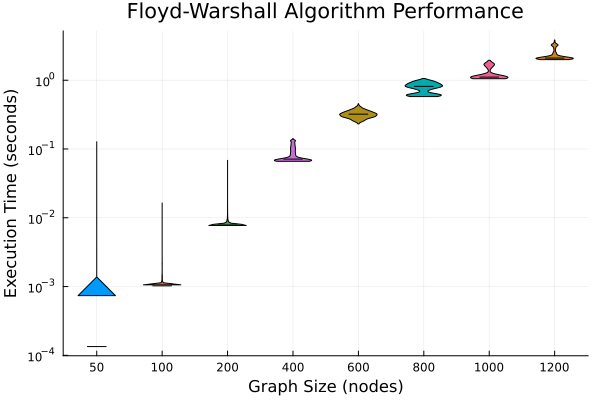

In [8]:
using StatsPlots
using Dates

# Run experiment
times = run_experiment(0.75, 0.1, 420.0)
sizes_series = ["50" "100" "200" "400" "600" "800" "1000" "1200"]

violin(
    sizes_series,
    times,
    xlabel = "Graph Size (nodes)",
    ylabel = "Execution Time (seconds)",
    title = "Floyd-Warshall Algorithm Performance",
    show_median = true,
    legend = false,
    yscale = :log10,
)

In [9]:
savefig("plots/floyd_warshall_violin_plot_$(Dates.format(Dates.now(), "yyyymmdd_HHMM")).png")

"c:\\VSCodeProjects\\discrete-math\\path-finding\\plots\\floyd_warshall_violin_plot_20250525_2352.png"